In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Operadores de Pixel: Coordenadas cromáticas
Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contrastre.

### Imagenes de entrada

In [40]:
TEST_IMAGE_ROOT_PATH = "imgs/coord_cromaticas/"
TEST_IMAGES_FILENAMES = ["CoordCrom_1.png", "CoordCrom_2.png", "CoordCrom_3.png"]

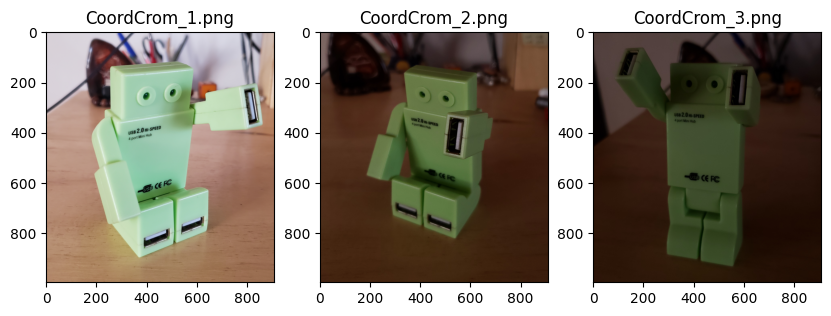

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=len(TEST_IMAGES_FILENAMES))
fig.set_size_inches(10, 6)
for ax, img_file in zip(axs, TEST_IMAGES_FILENAMES):
    raw_img = mpimg.imread(TEST_IMAGE_ROOT_PATH + img_file)
    ax.imshow(raw_img)
    ax.set_title(img_file)

### Implementación del algoritmo

In [42]:
def chromatic_coordinates(image: np.ndarray) -> np.ndarray:
    """Normalize each color channel the sum of all channels"""
    new_img = np.zeros(shape=image.shape, dtype=float)
    intensity = image.astype(float).sum(axis=2) # sum rgb channels (axis 2)
    for color_chn in range(3):
        np.divide(image[:,:,color_chn], intensity, out=new_img[:,:,color_chn], where=intensity>0)
    return new_img

### Resultados
A continuación, en la fila superior de la figura se observan las imágenes originales y en la fila inferior las imágenes obtenedias al aplicar el algoritmo de pasaja a coordenadas cromáticas.

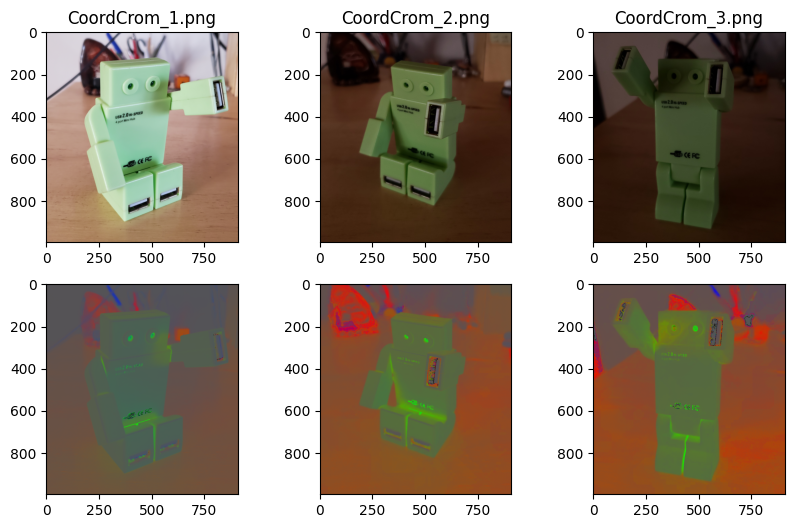

In [43]:
fig, axs = plt.subplots(nrows=2, ncols=len(TEST_IMAGES_FILENAMES))
fig.set_size_inches(10, 6)
for ax_raw, ax_cc, img_file in zip(axs[:][0], axs[:][1], TEST_IMAGES_FILENAMES):
    raw_img = mpimg.imread(TEST_IMAGE_ROOT_PATH + img_file)[:, :, :3].astype(float)
    ax_raw.imshow(raw_img)
    ax_raw.set_title(img_file)
    ax_cc.imshow(chromatic_coordinates(raw_img))